In [127]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [21]:
nx.__version__

'2.4'

Реализовать базовый алгоритм расстановки меток с использованием случайного блуждания. Применить его для эмперического графа, содержащего не менее 70 и не более 200 узлов.

Используя алгоритм Гирвана-Ньюмена разбить эмпирический граф на два сообщества. Выбрав два узла из разны сообществ провести случайное блуждание из этих узлов и выбрать принадлежность каждого из узлов к одному из двух сообеств по близости в результате блуждания. 

Визуализировать результаты:
* разибиения на 2 сообщества с помощью алгоритма Гирвана-Ньюмена
* результаты случайного блуждания из 1 центра
* результаты случайного блуждания из 2 центра
* резульатты выбора сообщества в результате случайного блуждания

In [778]:
g = nx.read_adjlist('mammalia-dolphin-floridatravel/mammalia-dolphin-floridatravel.edges',  create_using= nx.DiGraph())
G = g.to_undirected()
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 188
Number of edges: 1224
Average degree:  13.0213


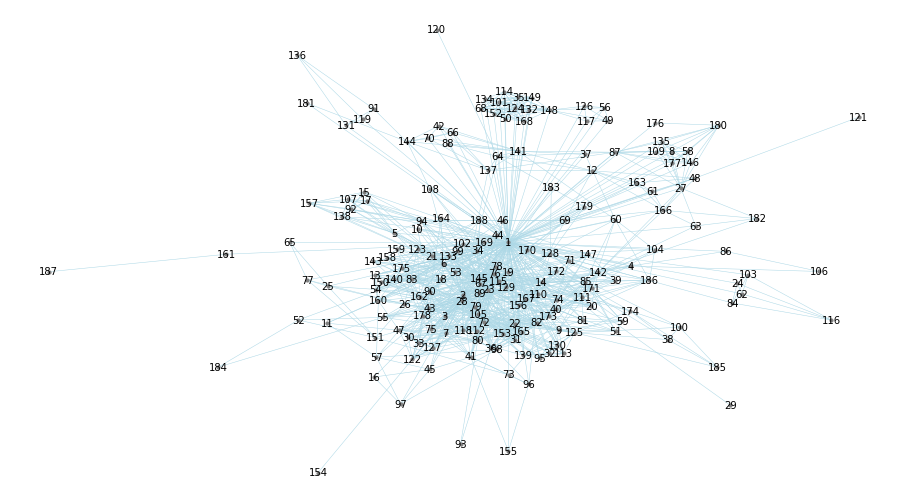

In [679]:
# визуализация
def view(G):
    plt.figure(figsize=(16,9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color='grey')
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='lightblue',)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.axis('off')
    plt.show()
view(G)

In [680]:
print('количество узлов: ',len(G))

количество узлов:  188


In [765]:
G.nodes

NodeView(('1', '35', '132', '101', '134', '168', '50', '114', '148', '149', '152', '68', '124', '2', '33', '7', '72', '47', '80', '178', '118', '122', '28', '90', '30', '127', '3', '162', '105', '75', '76', '41', '23', '4', '106', '86', '5', '6', '138', '107', '15', '17', '92', '157', '94', '10', '13', '14', '18', '150', '133', '160', '164', '40', '169', '174', '175', '54', '34', '79', '81', '83', '98', '111', '139', '8', '135', '109', '177', '146', '180', '87', '58', '27', '9', '32', '130', '167', '171', '173', '113', '82', '51', '85', '59', '125', '95', '11', '57', '12', '64', '163', '69', '166', '137', '141', '48', '61', '129', '142', '145', '19', '20', '39', '115', '53', '186', '67', '71', '74', '99', '102', '147', '16', '97', '45', '158', '159', '170', '172', '110', '78', '156', '29', '21', '128', '44', '140', '89', '123', '22', '36', '165', '153', '31', '46', '24', '84', '116', '62', '103', '25', '65', '26', '77', '151', '182', '63', '143', '43', '55', '112', '108', '93', '37', '

In [779]:
def from_0 (graph):
    G.add_node(0)
    for i in [e for e in G.edges]:
        (a,b) = i
        a_int,b_int = int(a), int(b)
        G.add_node(a_int-1)
        G.add_node(b_int-1)
        G.add_edge(a_int-1, b_int-1, graph=G)
    for i in [e for e in G.nodes]:
        if type(i)== str:
            G.remove_node(i)
from_0 (G)
G.nodes

NodeView((0, 34, 131, 100, 133, 167, 49, 113, 147, 148, 151, 67, 123, 1, 32, 6, 71, 46, 79, 117, 121, 27, 89, 29, 126, 2, 161, 104, 74, 75, 40, 22, 3, 85, 4, 5, 137, 106, 14, 16, 91, 93, 9, 12, 13, 17, 149, 132, 159, 163, 39, 173, 174, 53, 33, 78, 80, 82, 97, 110, 138, 7, 134, 108, 176, 145, 86, 57, 26, 8, 31, 129, 166, 170, 112, 81, 50, 84, 58, 124, 94, 10, 56, 11, 63, 162, 68, 165, 136, 140, 47, 60, 128, 141, 144, 18, 19, 38, 114, 52, 66, 70, 73, 98, 101, 146, 15, 44, 157, 158, 169, 109, 77, 155, 20, 127, 43, 139, 88, 122, 21, 35, 164, 152, 30, 45, 23, 83, 61, 102, 24, 64, 25, 76, 62, 42, 54, 111, 107, 36, 59, 37, 99, 95, 72, 41, 143, 65, 69, 48, 55, 116, 125, 51, 103, 87, 178, 90, 130, 118, 160, 175, 177, 96, 172, 92, 153, 142, 168, 182, 154, 171, 105, 156, 185, 187, 184, 179, 181, 119, 120, 150, 28, 115, 183, 180, 135, 186))

Реализуем базовый асинхронный алгоритм расстановки меток (label propagagtion)

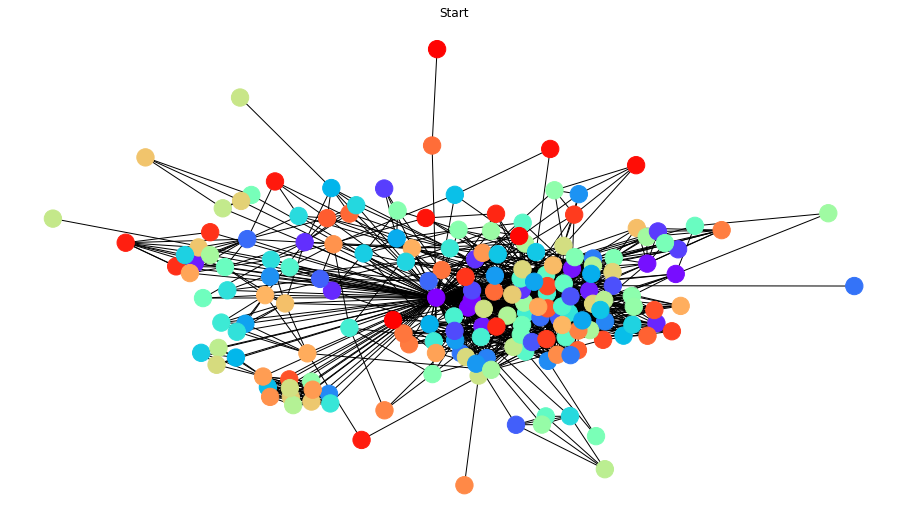

In [768]:
# Визуализация разделения на классы
def draw_classes(graph, communities,title = ''):
    rainbow = cm.rainbow(np.linspace(0, 1, max(communities.values())+1))
    node_color = [rainbow[communities[it]] for it in graph.nodes]
    plt.figure(figsize=(16,9))
    plt.title(title)
    nx.draw(graph, node_color=node_color)
    plt.show()

draw_classes(G, {i: i for i in range(len(G))}, 'Start')

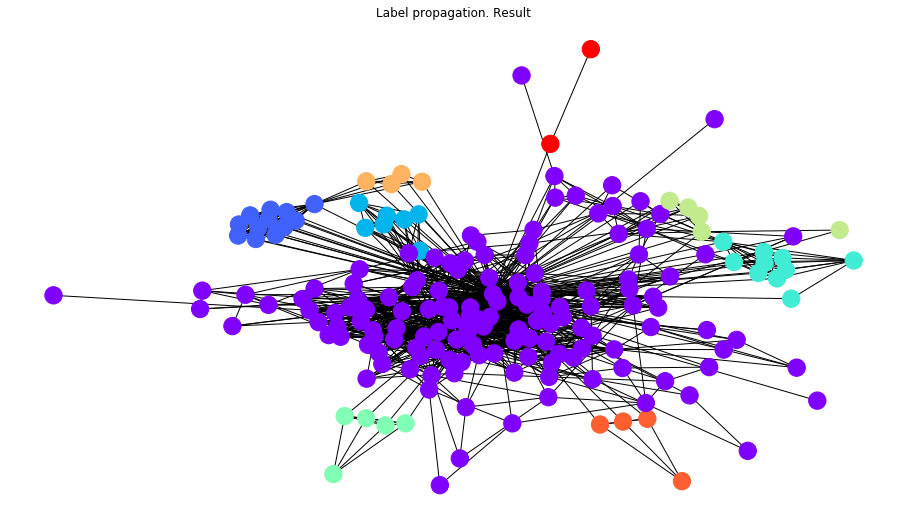

количество классов:  9


In [769]:
# Произведем разделение на классы с помощью расстановки меток
# Используем функцию из community.label_propagation для асинхронной расстановки меток asyn_lpa_communities
from networkx.algorithms import community
partition = community.label_propagation.asyn_lpa_communities(G, seed=np.random)

def to_community(partition): # Преобразуем в communities для визуализации
    c = list(partition)
    com = {}
    num = 0
    for i in c:
        arr = []
        for k in i:
            com[k]=num
        num+=1
    return com

draw_classes(G,to_community(partition),'Label propagation. Result')
classes = collections.Counter(com.values())
k_cl = len(classes)
print('количество классов: ', k_cl)
# print(community.quality.coverage(G,c))
# print(community.quality.performance(G,c))

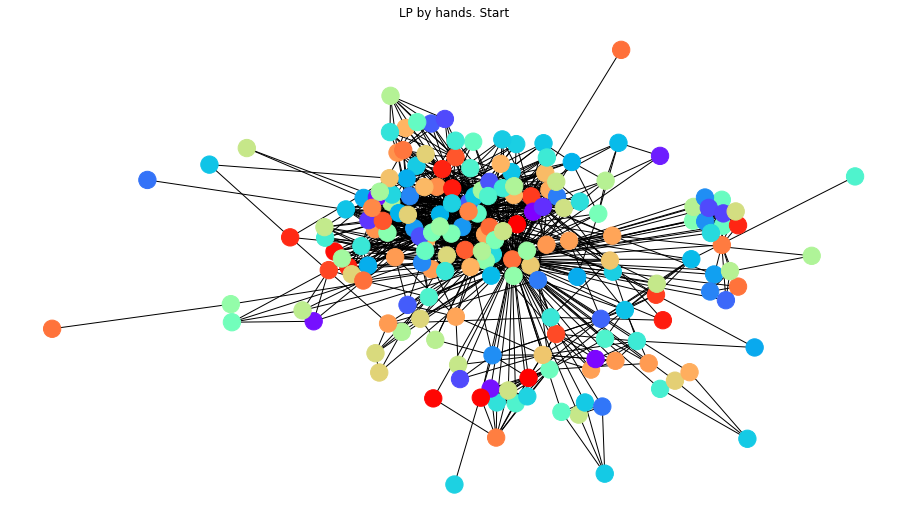

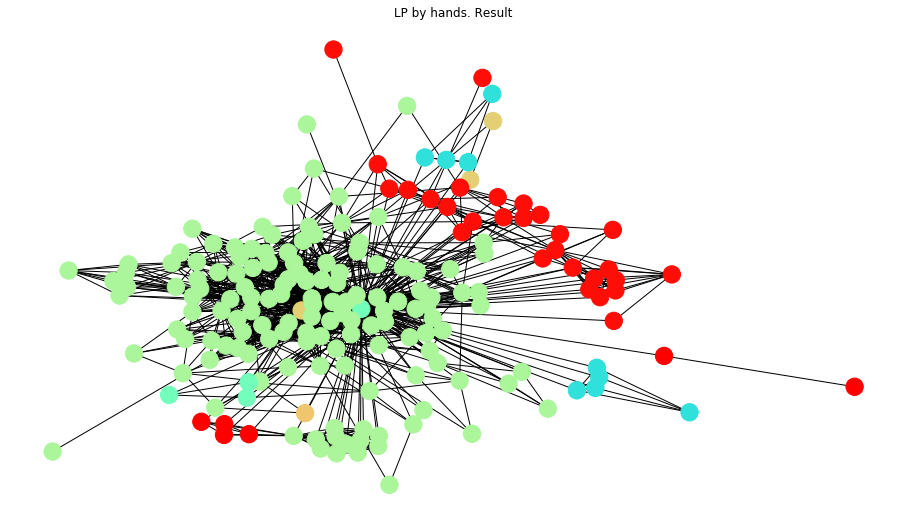

количество классов:  8


In [856]:
# Собственная реализация алгоритма расстановки меток
def label_propagation_by_hands(G,  iterations): 
    # G - используемый граф
    # iterations - количество итераций
    from random import randint
    import collections
#     k=188    # (верхнее ограничение по количеству классов)
    com_st = []
    for i in range (188): # создаем список для разделения на классы
        com_st.append(set())

    for i in G.nodes: # заполняем список первоначальным распредлением на классы (классов по количеству элементов)
        rand_com = randint(0, 187)
        com_st[rand_com].add(i)
    com_st = to_community(com_st)
    
    draw_classes(G,com_st,'LP by hands. Start')
    
    for it in range (iterations): # алгоритм расстановки меток
        for n in G.nodes:
            neigh_classes = []
            neigh = G.neighbors(n)
            for i in neigh: # для каждого узла запоняем список соседей
                neigh_classes.append(com_st[i])
            freq_map = {neigh_classes.count(val):val for val in set(neigh_classes)} # карта частотности классов соседей
            new_class = freq_map[max(freq_map.keys())] # самый частый класс
            com_st[n] = new_class # присваиваем узлу значение самого частотного класса
    classes = collections.Counter(com_st.values())
    k_cl = len(classes)
    draw_classes(G,com_st, 'LP by hands. Result')
    print('количество классов: ', k_cl)

label_propagation_by_hands(G,  1)

Алгоритм Гирван-Ньюмана

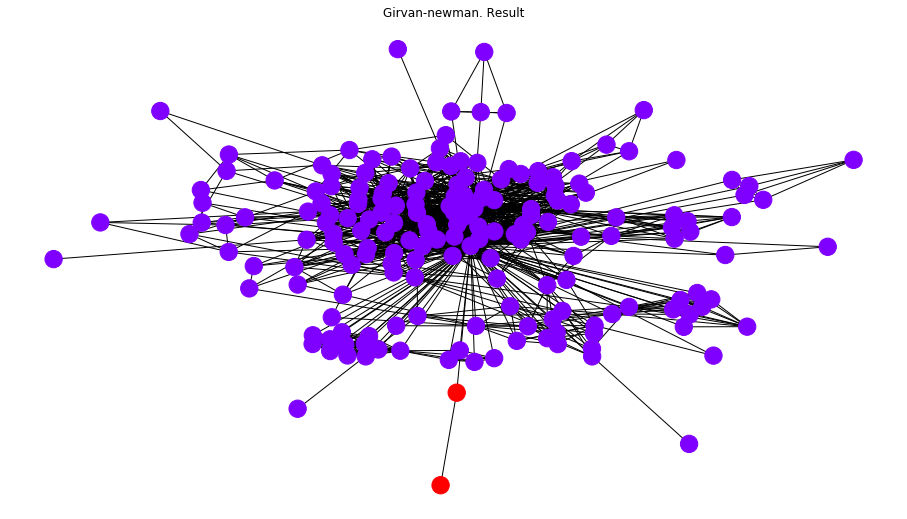

In [772]:
# Проведем разделение на два сообщества с помощью алгоритма Гирван-Ньюмана автоматически. ( функция girvan_newman(G))
from networkx.algorithms import community
import itertools

def k_communities_girvan_newman(G, k):
    # G - используемый граф
    # k - требуемое количество классов
    
    comp = community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, comp)
    i=1
    for communities in limited:
        pre = tuple(sorted(c) for c in communities)
#         draw_classes(G, to_community(pre),f'Iteration {i+1}')
        i+=1
    draw_classes(G,to_community(pre),'Girvan-newman. Result')

k_communities_girvan_newman(G, 2)

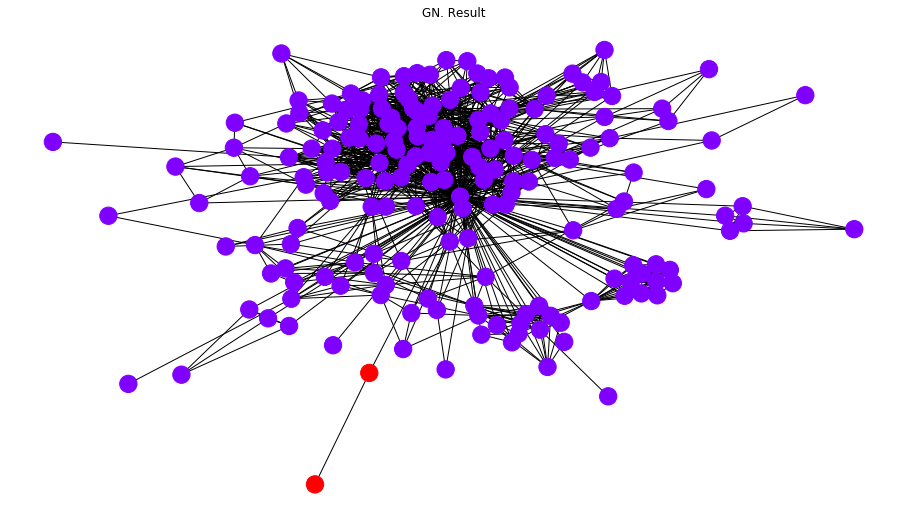

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185}, {0, 1}]


In [860]:
g = nx.read_adjlist('mammalia-dolphin-floridatravel/mammalia-dolphin-floridatravel.edges',  create_using= nx.DiGraph())
G = g.to_undirected()
from_0 (G)

from networkx.algorithms import components


# Собственная реализация алгоритма Гиван-Ньюмана
def get_key(d, value): # поиск ключа по значению в словаре
    for k, v in d.items():
        if v == value:
            return k
def GN_by_hands(G,k):
    # G - используемый граф
    # k - требуемое количество классов
    
    import copy as c
    A = c.deepcopy(G)
    it=1
    k_classes=1
    while k_classes < k:
        between = centrality.edge_betweenness_centrality(A) # степени посредничества для связей
        max_betw = max(between.values())

        a,b = get_key(between, max_betw)[0],get_key(between, max_betw)[1]
        A.remove_edge(a,b)    # убираем связи с самой высокойстепенью посредничества
        # Построить новое распределение
        set_of_classes = [] 
        for i in G.nodes: # отделаем друг от друга части графа, между которыми нет связей
            set_of_classes.append(components.node_connected_component(A, i))
        new_set = []
        for i in set_of_classes: # собирем новое распределение
            if i not in new_set:
                new_set.append(i)
        k_classes = len(new_set)
        it+=1
        com_st=[]
        for i in range (k_classes): # создаем список для разделения на классы
            com_st.append(set())
        for i in range(len(new_set)):
            for el in range(len(new_set[i])):
                com_st[i].add(el)
#     draw_classes(A,to_community(new_set),f'Iterations: {it}')
    draw_classes(G,to_community(new_set),'GN. Result')
    return com_st

res  = GN_by_hands(G,2) # разделяем на 2 класса
print(res)

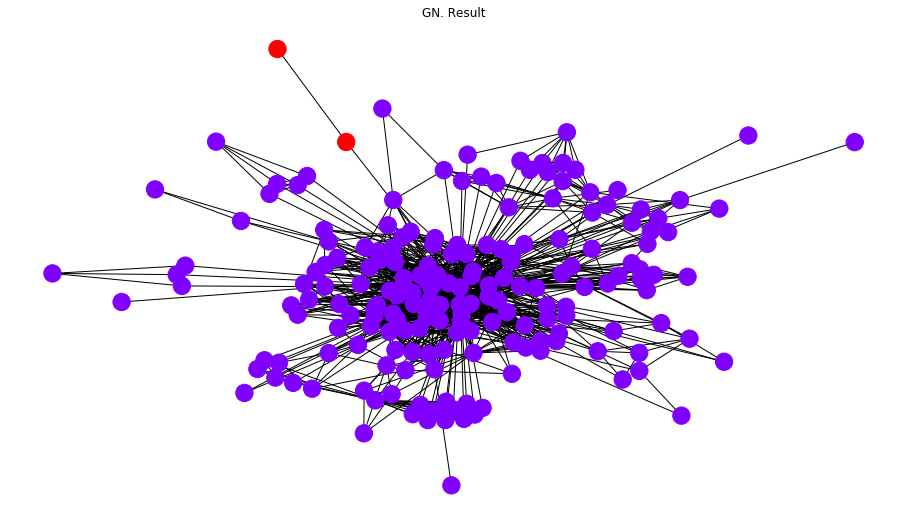

1 й класс: блуждание закончилось в том же классе  [1, 0]
2 й класс: блуждание закончилось в том же классе  [179, 81]


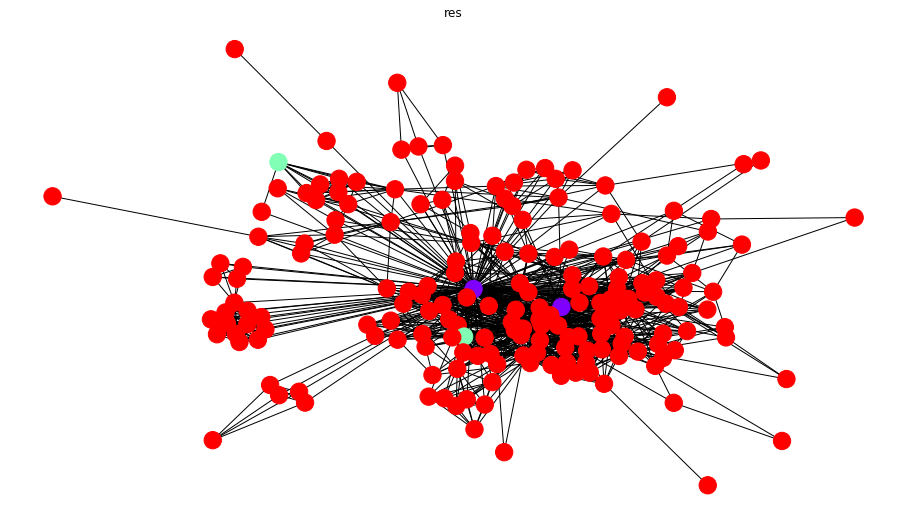

In [861]:
# Случайное блуждание из двух узлов развнх классов
classes = GN_by_hands(G,2)
import random
from random import randint
def random_walk(classes):
    dict_classes = to_community(classes) # словарь-распредление по классам
    k_classes = dict_classes.values()
    cl_set=[]
    for i in k_classes:
        if i not in cl_set:
            cl_set.append(i)
    path=[]
    for i in cl_set:
        clas=[]
        for l in dict_classes.keys():
            if dict_classes[l] == i:
                clas.append(l)
        start = random.choice(clas)
        clas.pop(start)
        new_step = random.choice(clas)
        path.append([start,new_step])
    for i in range(len(path)):
        if dict_classes[path[i][0]] == dict_classes[path[i][1]]:
            print(i+1, 'й класс: блуждание закончилось в том же классе ',path[i] )
        else:
            print(i+1, 'й класс: блуждание закончилось в другом класса ',path[i])
        
    c = to_community(path)
    for i in G.nodes:
        if i not in c.keys():
            c[i]=len(cl_set)
    draw_classes(G, c, 'res')
random_walk(classes)